<a href="https://colab.research.google.com/github/eliasingi12/DEEP_U-net_Project/blob/master/DEEP_run_test_with_greyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!curl -L -o DRIVE.zip "https://drive.google.com/uc?export=download&id=1aSJuBxtklXelBJEt-kvG32QQYO1BIQyP"
!unzip DRIVE.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   388    0   388    0     0     72      0 --:--:--  0:00:05 --:--:--    93
100 28.7M    0 28.7M    0     0  4054k      0 --:--:--  0:00:07 --:--:-- 26.4M
Archive:  DRIVE.zip
replace DRIVE/test/mask/12_test_mask.gif? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: DRIVE/test/mask/12_test_mask.gif  
 extracting: DRIVE/test/mask/10_test_mask.gif  
 extracting: DRIVE/test/mask/08_test_mask.gif  
 extracting: DRIVE/test/mask/06_test_mask.gif  
 extracting: DRIVE/test/mask/04_test_mask.gif  
 extracting: DRIVE/test/mask/01_test_mask.gif  
 extracting: DRIVE/test/mask/05_test_mask.gif  
 extracting: DRIVE/test/mask/13_test_mask.gif  
 extracting: DRIVE/test/mask/02_test_mask.gif  
 extracting: DRIVE/test/mask/19_test_mask.gif  
 extracting: DRIVE/test/mask/15_test_mask.gif  
 extracting: DRIVE/test/mask/16_test_mask.gif  
 extra

In [0]:
import os  # misc operating system specific operations, e.g., reading directries.
import sys
import random

import cv2
import numpy as np

%matplotlib inline 
import matplotlib.pyplot as plt

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Cropping2D
from keras.models import Sequential, Model
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report

from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Activation, UpSampling2D, BatchNormalization
from keras.optimizers import RMSprop

In [0]:
# Some parameters and paths to data
#dir_path = os.path.dirname(os.path.realpath(__file__))
path_train = 'DRIVE/training/'
path_test = 'DRIVE/test/'
path_img = 'images'
path_mask = 'mask'
path_targets = '1st_manual'
path_tif_targets = '1st_manual_tif'
# pre_dir = "/content/drive/My Drive/DRIVE/"

In [0]:
# Read in the file paths of the images to use for the training.
random_seed = 42
sz = 64
image_paths = []
target_paths = []
test_image_paths = []
test_target_paths = []

args = {}
args["training_imgs"] = "DRIVE/training/images"
args["targets"] = "DRIVE/training/1st_manual_tif"
args["testing_imgs"] = "DRIVE/test/images/"
args["testing_targets"] = "DRIVE/test/1st_manual_tif"

# Training
for (dirpath, dirnames, filenames) in os.walk(args["training_imgs"]):
    for file in filenames:
        if '.tif' in file and not file.startswith('.'):
              image_paths.append(os.path.join(dirpath, file))

for (dirpath, dirnames, filenames) in os.walk(args["targets"]):
    for file in filenames:
        if '.tiff' in file and not file.startswith('.'):
              target_paths.append(os.path.join(dirpath, file))
            
# Testing
for (dirpath, dirnames, filenames) in os.walk(args["testing_imgs"]):
    for file in filenames:
        if '.tif' in file and not file.startswith('.'):
              test_image_paths.append(os.path.join(dirpath, file))

for (dirpath, dirnames, filenames) in os.walk(args["testing_targets"]):
    for file in filenames:
        if '.tiff' in file and not file.startswith('.'):
              test_target_paths.append(os.path.join(dirpath, file))
            
                
random.seed(random_seed)

def show_images(imgs, grid_size=3):
    f, axarr = plt.subplots(grid_size,grid_size, figsize=(15, 15))
    for i in range(grid_size):
        for j in range(grid_size):
            axarr[i,j].imshow(imgs[i*grid_size+j])
    plt.show()

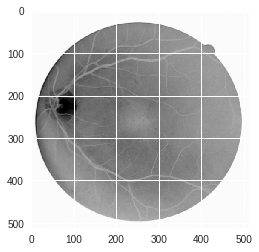

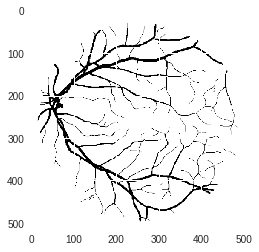

In [75]:
# Training pre-processing
image_paths.sort()
input_data = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.resize(image, (512, 512))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    input_data.append(image)
    
target_paths.sort()
target_data = []
for target_path in target_paths:
    target = cv2.imread(target_path)
    target = cv2.resize(target, (512, 512))
    target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)
    target_data.append(target)
    
plt.imshow(input_data[0], interpolation='nearest')
plt.show()
plt.imshow(target_data[0], interpolation='nearest')
plt.show()

input_data = np.array(input_data)
target_data = np.array(target_data)

input_data = input_data.reshape(input_data.shape[0], 512, 512, 1)
target_data = target_data.reshape(target_data.shape[0], 512, 512, 1)

input_data = input_data.astype('float32')
target_data = target_data.astype('float32')

input_data/=255
target_data/=255

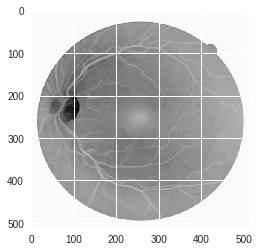

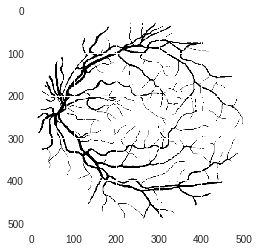

In [78]:
# Testing pre-processing
test_image_paths.sort()
test_input_data = []
for test_image_path in test_image_paths:
    test_image = cv2.imread(test_image_path)
    test_image = cv2.resize(test_image, (512, 512))
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    test_input_data.append(test_image)
    
test_target_paths.sort()
test_target_data = []
for test_target_path in test_target_paths:
    test_target = cv2.imread(test_target_path)
    test_target = cv2.resize(test_target, (512, 512))
    test_target = cv2.cvtColor(test_target, cv2.COLOR_BGR2GRAY)
    test_target_data.append(test_target)
    
plt.imshow(test_input_data[0], interpolation='nearest')
plt.show()
plt.imshow(test_target_data[0], interpolation='nearest')
plt.show()

test_input_data = np.array(test_input_data)
test_target_data = np.array(test_target_data)

test_input_data = test_input_data.reshape(test_input_data.shape[0], 512, 512, 1)
test_target_data = test_target_data.reshape(test_target_data.shape[0], 512, 512, 1)

test_input_data = test_input_data.astype('float32')
test_target_data = test_target_data.astype('float32')

test_input_data/=255
test_target_data/=255

In [0]:
def unet(height,width,n_ch):
    inputs = Input((height,width,n_ch))
    
    # First set of layers
    down1 = Conv2D(64, (3,3), padding='same')(inputs)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1 = Conv2D(64, (3,3), padding='same')(down1)
    down1 = BatchNormalization()(down1)
    down1 = Activation('relu')(down1)
    down1_pool = MaxPooling2D((2,2))(down1)

    # Second set of layers
    down2 = Conv2D(128, (3,3), padding='same')(down1_pool)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2 = Conv2D(128, (3,3), padding='same')(down2)
    down2 = BatchNormalization()(down2)
    down2 = Activation('relu')(down2)
    down2_pool = MaxPooling2D((2,2))(down2)

    # Third set of layers
    down3 = Conv2D(256, (3,3), padding='same')(down2_pool)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3 = Conv2D(256, (3,3), padding='same')(down3)
    down3 = BatchNormalization()(down3)
    down3 = Activation('relu')(down3)
    down3_pool = MaxPooling2D((2,2))(down3)

    # Fourth set of layers
    down4 = Conv2D(512, (3,3), padding='same')(down3_pool)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4 = Conv2D(512, (3,3), padding='same')(down4)
    down4 = BatchNormalization()(down4)
    down4 = Activation('relu')(down4)
    down4_pool = MaxPooling2D((2,2))(down4)

    # Fifth set of layers
    mid = Conv2D(1024, (3,3), padding='same')(down4_pool)
    mid = BatchNormalization()(mid)
    mid = Activation('relu')(mid)
    mid = Conv2D(1024, (3,3), padding='same')(mid)
    mid = BatchNormalization()(mid)
    mid = Activation('relu')(mid)

    # First up layers
    up4 = UpSampling2D((2,2))(mid)
    up4 = concatenate([down4,up4], axis=3)
    up4 = Conv2D(512, (3,3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3,3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)
    up4 = Conv2D(512, (3,3), padding='same')(up4)
    up4 = BatchNormalization()(up4)
    up4 = Activation('relu')(up4)

    # Second up layers
    up3 = UpSampling2D((2,2))(up4)
    up3 = concatenate([down3,up3], axis=3)
    up3 = Conv2D(256, (3,3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3,3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)
    up3 = Conv2D(256, (3,3), padding='same')(up3)
    up3 = BatchNormalization()(up3)
    up3 = Activation('relu')(up3)

    # Third up layers
    up2 = UpSampling2D((2,2))(up3)
    up2 = concatenate([down2,up2], axis=3)
    up2 = Conv2D(128, (3,3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3,3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)
    up2 = Conv2D(128, (3,3), padding='same')(up2)
    up2 = BatchNormalization()(up2)
    up2 = Activation('relu')(up2)

    # Fourth up layers
    up1 = UpSampling2D((2,2))(up2)
    up1 = concatenate([down1,up1], axis=3)
    up1 = Conv2D(64, (3,3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3,3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)
    up1 = Conv2D(64, (3,3), padding='same')(up1)
    up1 = BatchNormalization()(up1)
    up1 = Activation('relu')(up1)

    # Output layer
    out = Conv2D(1, (1,1), padding='same')(up1)
    out = Activation('sigmoid')(out)

    model = Model(inputs=inputs, outputs=out)

    model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [80]:
# Run model

EPOCHS=5

model = unet(512,512,1)
#model.summary()

model.fit(input_data, target_data, epochs=EPOCHS, batch_size=1)

Epoch 1/5
20/20 [==============================] - 31s 2s/step - loss: 0.3806 - acc: 0.8430
Epoch 2/5
20/20 [==============================] - 19s 925ms/step - loss: 0.2344 - acc: 0.9070
Epoch 3/5
20/20 [==============================] - 19s 935ms/step - loss: 0.2040 - acc: 0.9120
Epoch 4/5
20/20 [==============================] - 19s 942ms/step - loss: 0.1890 - acc: 0.9132
Epoch 5/5
20/20 [==============================] - 19s 944ms/step - loss: 0.1776 - acc: 0.9147


(512, 512)
(512, 512)


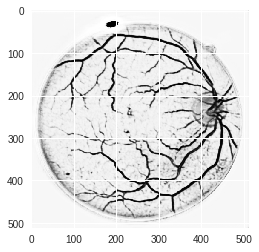

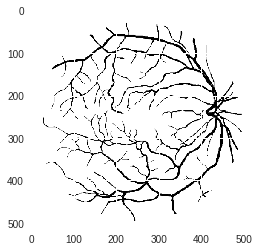

In [91]:
# Test image from test/images
test_img = test_input_data[16]

# Expand dimension at front to match model input
test_img = np.expand_dims(test_img, axis=0)

# Output from network
outp = model.predict(test_img, batch_size=1)

# Reshape to match plt.imshow() shape
outp = outp.reshape((512,512))
print(outp.shape)

# Same for target data / mask
test_target = test_target_data[16]
test_target = test_target.reshape((512,512))
print(test_target.shape)

# Plot images
plt.imshow(outp, interpolation='nearest')
plt.show()

plt.imshow(test_target, interpolation='nearest')
plt.show()

In [0]:

def soft_dice_loss(y_true, y_pred, epsilon=1e-6): 
    ''' 
    Soft dice loss calculation for arbitrary batch size, number of classes, and number of spatial dimensions.
    Assumes the `channels_last` format.
  
    # Arguments
        y_true: b x X x Y( x Z...) x c One hot encoding of ground truth
        y_pred: b x X x Y( x Z...) x c Network output, must sum to 1 over c channel (such as after softmax) 
        epsilon: Used for numerical stability to avoid divide by zero errors
    
    # References
        V-Net: Fully Convolutional Neural Networks for Volumetric Medical Image Segmentation 
        https://arxiv.org/abs/1606.04797
        More details on Dice loss formulation 
        https://mediatum.ub.tum.de/doc/1395260/1395260.pdf (page 72)
        
        Adapted from https://github.com/Lasagne/Recipes/issues/99#issuecomment-347775022
    '''
    
    # skip the batch and class axis for calculating Dice score
    axes = tuple(range(1, len(y_pred.shape)-1)) 
    numerator = 2. * np.sum(y_pred * y_true, axes)
    denominator = np.sum(np.square(y_pred) + np.square(y_true), axes)
    
    return 1 - np.mean(numerator / (denominator + epsilon)) # average over classes and batch